# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#url = f"http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather["coord"]["lat"])
        city_lng = (city_weather["coord"]["lon"])
        city_max_temp = (city_weather["main"]["temp_max"]-273.15)
        city_humidity = (city_weather["main"]["humidity"])
        city_clouds = (city_weather["clouds"]["all"])
        city_wind = (city_weather["wind"]["speed"])
        city_country = (city_weather["sys"]["country"])
        city_date = (city_weather["dt"])

        

        # # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as Er:
        print(Er)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | oleksandriya
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | midvagur
Processing Record 8 of Set 1 | gadzhiyevo
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | south hedland
Processing Record 15 of Set 1 | conception bay south
Processing Record 16 of Set 1 | kingston
Processing Record 17 of Set 1 | edson
Processing Record 18 of Set 1 | thunder bay
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | wailua 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,19.87,84,93,9.39,PT,1698714251
1,petropavlovsk-kamchatsky,53.0452,158.6483,5.33,62,0,6.00,RU,1698714251
2,kodiak,57.7900,-152.4072,7.73,93,100,3.60,US,1698714251
3,whitehorse,60.7161,-135.0538,1.72,93,100,3.60,CA,1698714251
4,oleksandriya,48.6696,33.1159,12.37,81,11,4.73,UA,1698714252


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,19.87,84,93,9.39,PT,1698714251
1,petropavlovsk-kamchatsky,53.0452,158.6483,5.33,62,0,6.00,RU,1698714251
2,kodiak,57.7900,-152.4072,7.73,93,100,3.60,US,1698714251
3,whitehorse,60.7161,-135.0538,1.72,93,100,3.60,CA,1698714251
4,oleksandriya,48.6696,33.1159,12.37,81,11,4.73,UA,1698714252


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

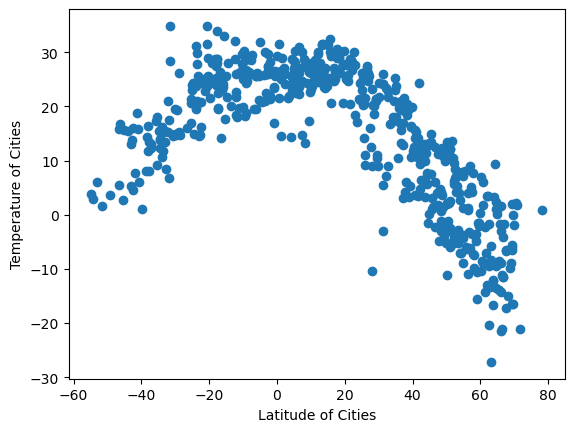

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude, temperature)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Temperature of Cities")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

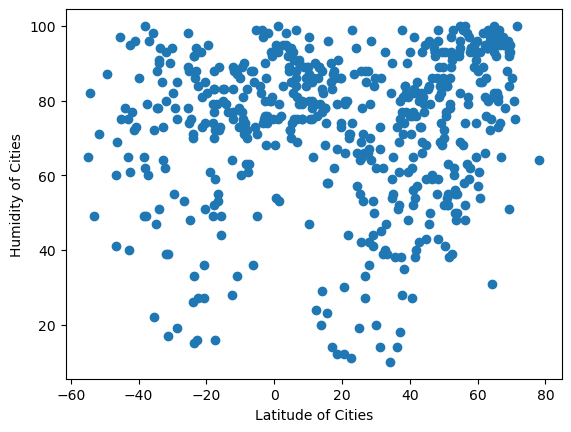

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Humidity of Cities")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

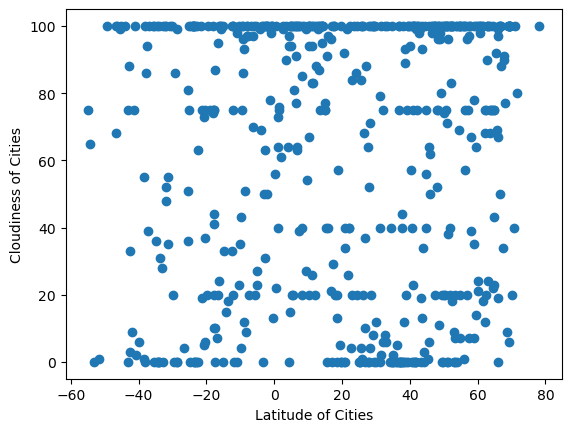

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Cloudiness of Cities")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

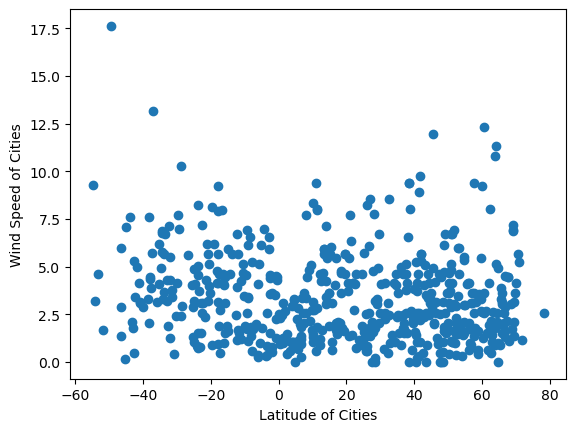

In [25]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
windspeed = city_data_df["Wind Speed"]
plt.scatter(latitude, windspeed)

# Incorporate the other graph properties
plt.xlabel("Latitude of Cities")
plt.ylabel("Wind Speed of Cities")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

    #plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="black")
    plt.xlabel("Latitude of Cities")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df[city_data_df["Lat"] >= 0]

northern_hemi_df = pd.DataFrame(northern_hemi)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,19.87,84,93,9.39,PT,1698714251
1,petropavlovsk-kamchatsky,53.0452,158.6483,5.33,62,0,6.00,RU,1698714251
2,kodiak,57.7900,-152.4072,7.73,93,100,3.60,US,1698714251
3,whitehorse,60.7161,-135.0538,1.72,93,100,3.60,CA,1698714251
4,oleksandriya,48.6696,33.1159,12.37,81,11,4.73,UA,1698714252


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df[city_data_df["Lat"] <= 0]

southern_hemi_df = pd.DataFrame(southern_hemi)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,adamstown,-25.0660,-130.1015,23.10,74,100,3.18,PN,1698714252
8,geraldton,-28.7667,114.6000,26.23,19,0,10.29,AU,1698714253
9,ushuaia,-54.8000,-68.3000,3.81,65,75,9.26,AR,1698714074
12,waitangi,-43.9535,-176.5597,15.46,78,100,7.60,NZ,1698714255
13,south hedland,-20.4089,118.5983,28.96,74,75,5.14,AU,1698714255


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7560072878880431


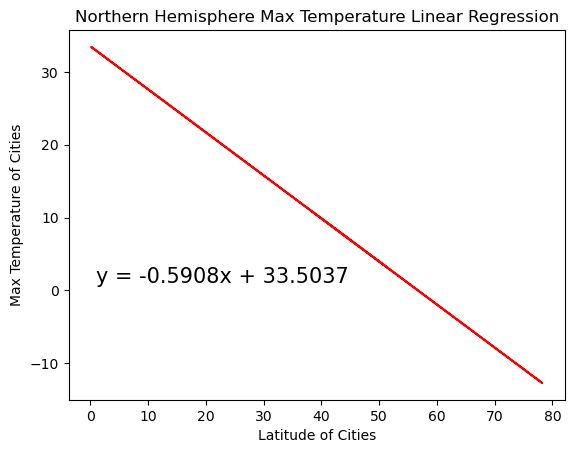

<Figure size 640x480 with 0 Axes>

In [15]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Northern Hemisphere Max Temperature Linear Regression")
lin_reg(x_values, y_values, "Max Temperature of Cities", (1,1))

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The r-value is: 0.5350637843368369


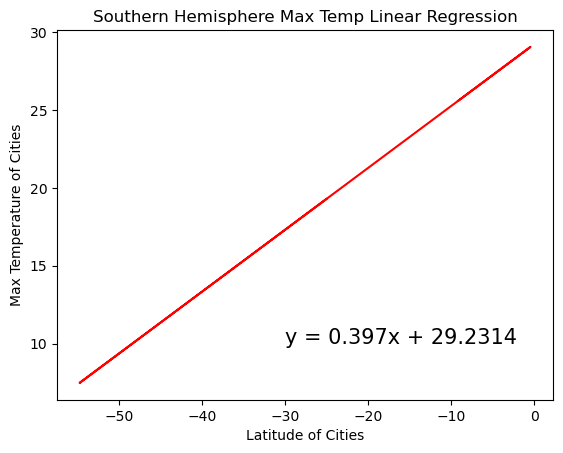

<Figure size 640x480 with 0 Axes>

In [26]:
# Linear regression on Southern Hemisphere

# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Southern Hemisphere Max Temp Linear Regression")
lin_reg(x_values, y_values, "Max Temperature of Cities", (-30, 10))


# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

As expected, the temperature is higher the closer we are to the equator, no matter North or South. The further away we get, the lower the temperature becomes.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.014644708617347886


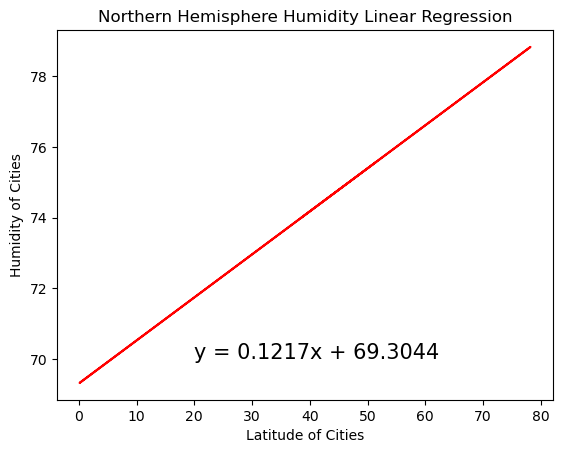

<Figure size 640x480 with 0 Axes>

In [27]:
# Northern Hemisphere

# Build scatter plot for latitude vs. humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("Northern Hemisphere Humidity Linear Regression")
lin_reg(x_values, y_values, "Humidity of Cities", (20, 70))

# Incorporate the other graph properties
#plt.xlabel("Latitude of Cities")
#plt.ylabel("Humidity of Cities")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot#
# plt.show()

The r-value is: 0.015530258675026613


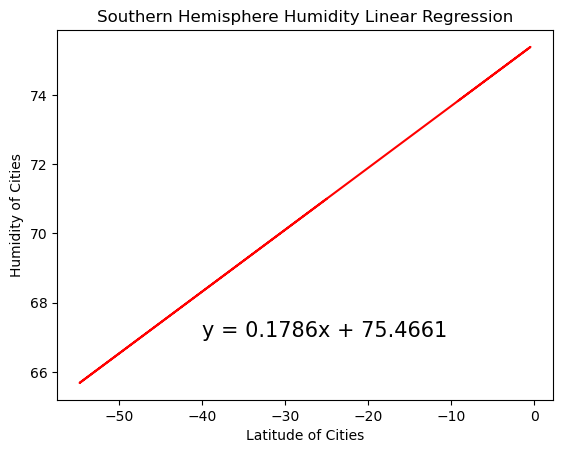

<Figure size 640x480 with 0 Axes>

In [28]:
# Southern Hemisphere

# Build scatter plot for latitude vs. humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title("Southern Hemisphere Humidity Linear Regression")
lin_reg(x_values, y_values, "Humidity of Cities", (-40, 67))


# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Discussion about the linear relationship:**

For humidity, the data shows something interesting. In the Northern hemisphere, the graph shows that humidity increases as we move further North from the equator. Strangely enough, the data shows the opposite - the closer we move to the equator from the lowest part of the Southern hemisphere, the humidity ALSO increases. I've inspected my code, and it appears to be correct. However, the data shows the opposite of what I would have expected. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0004591357558236619


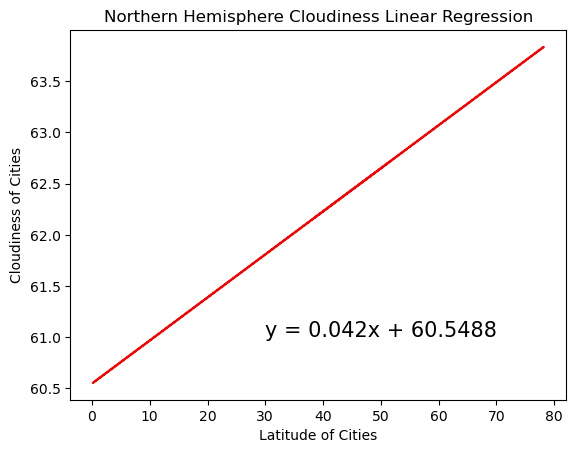

<Figure size 640x480 with 0 Axes>

In [30]:
# Northern Hemisphere

# Build scatter plot for latitude vs. cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#plt.plot_date(x_values, y_values)
plt.title("Northern Hemisphere Cloudiness Linear Regression")
lin_reg(x_values, y_values, "Cloudiness of Cities", (30, 61))

# Incorporate the other graph properties


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The r-value is: 0.017147561599329023


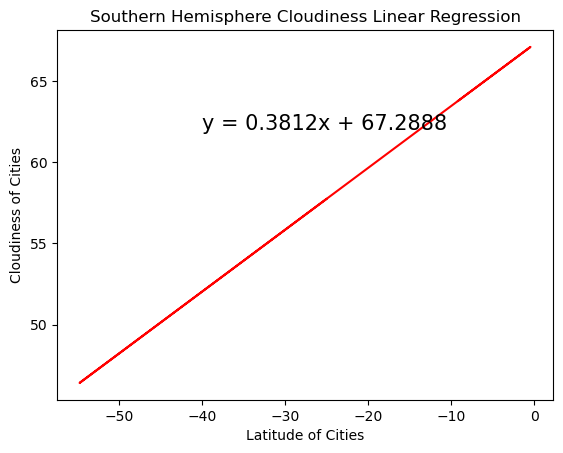

<Figure size 640x480 with 0 Axes>

In [20]:
# Southern Hemisphere

# Build scatter plot for latitude vs. cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("Southern Hemisphere Cloudiness Linear Regression")
lin_reg(x_values, y_values, "Cloudiness of Cities", (-40, 62))

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Much like humidity, the data for cloudiness shows us something unexpected. The closer we get to the equator in the Southern hemisphere, the cloudier cities become. In the Northern hemisphere, the trend is the same moving AWAY from the equator. Again, perhaps the code is wrong but these are interesting results if it is correct.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.003381844186940904


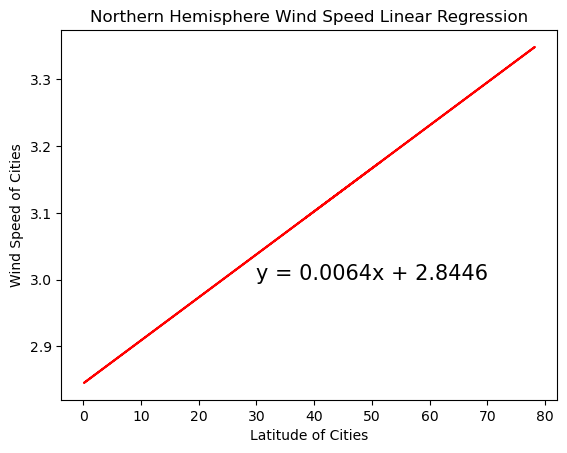

<Figure size 640x480 with 0 Axes>

In [21]:
# Northern Hemisphere

# Build scatter plot for latitude vs. wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Northern Hemisphere Wind Speed Linear Regression")
lin_reg(x_values, y_values, "Wind Speed of Cities", (30, 3.0))

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The r-value is: 0.056836249888632215


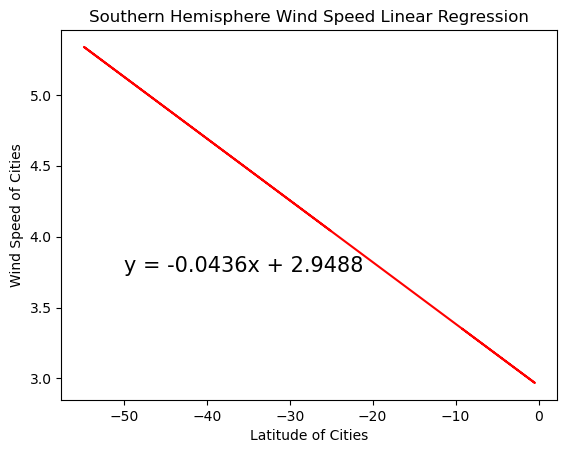

<Figure size 640x480 with 0 Axes>

In [22]:
# Southern Hemisphere

# Build scatter plot for latitude vs. wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Southern Hemisphere Wind Speed Linear Regression")
lin_reg(x_values, y_values, "Wind Speed of Cities", (-50, 3.75))

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

Examining both graphs shows us that the wind speed is lower the closer we get to the equator. The further away from the equator we travel, according to Latitude, the speed of the wind picks up. The futher away from the equator we are, no matter North or South, the average wind speed is higher. For many, this creates a less than ideal location to reside.